In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("data/merged_election_pages.csv", parse_dates=['timestamp'],
                                      index_col=['timestamp'],)

df.head()

,wikicode,hourly_views
timestamp,,
2014-05-15,cs.wikipedia,1.0
2014-05-15,da.wikipedia,2.0
2014-05-15,de.wikipedia,46.0
2014-05-15,el.wikipedia,4.0
2014-05-15,fi.wikipedia,4.0


In [65]:
# scaler = MinMaxScaler()
# df['views'] = df.groupby('wikicode')['hourly_views'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).ravel() / scaler.data_max_)
# df_daily = df.drop('hourly_views', axis=1,inplace=True)


df_daily = df.groupby([pd.Grouper(freq='D'), 'wikicode']).sum().unstack('wikicode')
df_daily.head()


hourly_views                                                      \
wikicode   cs.wikipedia da.wikipedia de.wikipedia el.wikipedia en.wikipedia   
timestamp                                                                     
2014-05-15         39.0        208.0      10510.0        422.0          0.0   
2014-05-16         35.0         95.0       7707.0        479.0          0.0   
2014-05-17         37.0         53.0       4619.0        452.0          0.0   
2014-05-18         39.0        102.0       8241.0        640.0          0.0   
2014-05-19         88.0        159.0      12183.0        680.0          0.0   

                                                                              \
wikicode   es.wikipedia fi.wikipedia fr.wikipedia hu.wikipedia. it.wikipedia   
timestamp                                                                      
2014-05-15       2800.0        151.0       5599.0           0.0       2671.0   
2014-05-16       2464.0        126.0       5765.0           0.0       2436.0   
2014-05-17       1814.0         83.0       3639.0           0.0       1832.0   
2014-05-18       2558.0         85.0       5719.0           0.0       2694.0   
2014-05-19       3513.0        131.0       8671.0           0.0       5420.0   

                                                                
wikicode   nl.wikipedia pl.wikipedia sl.wikipedia sv.wikipedia  
timestamp                                                       
2014-05-15        476.0       2139.0          6.0        601.0  
2014-05-16        390.0       1618.0          5.0        376.0  
2014-05-17        221.0       1132.0          8.0        301.0  
2014-05-18        393.0       1548.0          8.0        580.0  
2014-05-19        555.0       2245.0         14.0        809.0

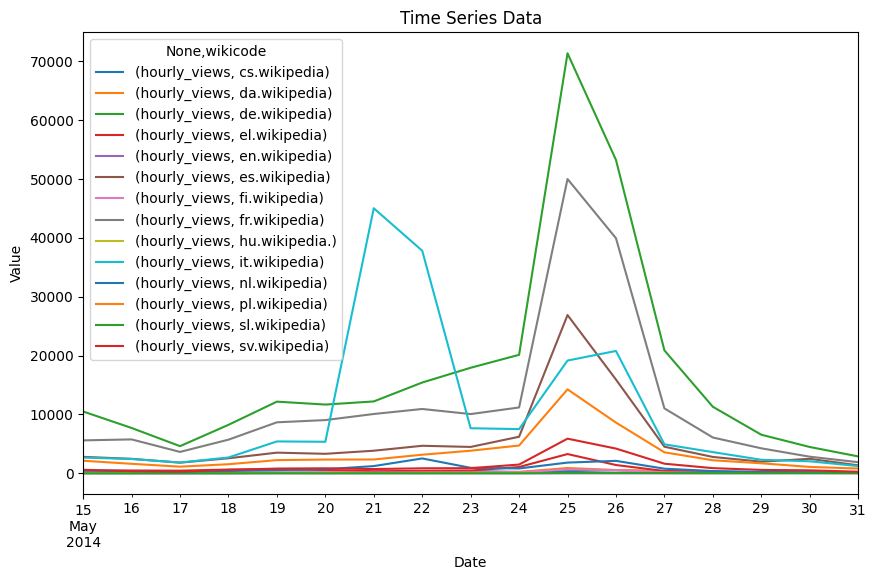

In [66]:
df_2014 = df_daily[df_daily.index.year == 2014]

df_2014.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()